# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import requests
import random
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"

#select multiple agents
Agents=['Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
       'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36 Edg/93.0.961.52',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 13_1) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15'
       ]


pages = 29
page_size = 100

reviews = []
name_= []
rating_overall= []
review_stats= []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    
    Agent=random.choice(Agents)
    header={'User-Agent':Agent}
    
    # Collect HTML data from this page
    response= requests.get(url, headers= header)
    html=response.content
    
    # Parse content
    parsed_content = BeautifulSoup(html,'html.parser')
    
    #extract review content
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
            
    #extract registered name of the customer
    for name in parsed_content.find_all('span', {'itemprop': 'name'}):
        if name.text is not None:
            name_.append(name.text)
        else:
            name_.append('N/A')

    #extract overall rating out of 10
    is_first_rating = True  # initialize flag
    for rating in parsed_content.find_all('span', {'itemprop': 'ratingValue'}):
        if is_first_rating:
            is_first_rating = False  # update flag for subsequent ratings
            continue  # skip the first rating
        rating_overall.append(rating.text.strip())
        
    #extract review-stats including: aircraft, type of traveller, route    
    data_all = parsed_content.find_all('div', {'class': 'review-stats'})
    for customer in data_all:
        customer_dict = {}
    
        for row in customer.find_all('tr'): 
            cells = row.find_all('td')
            category = cells[0].text.strip()
            if cells[1].span is not None:
                stars = max([int(span.text) for span in cells[1].find_all('span', {'class': 'star fill'})])
                customer_dict[category] = stars
            else:
                value = cells[1].text.strip()
                customer_dict[category] = value
        review_stats.append(customer_dict)
        #time.sleep(random.randint(1,2))

    
    print(f"   ---> {len(reviews)} total reviews")
    
#generage dataframe   
df= pd.DataFrame()
df["name"] = name_
df['rating_overall']= rating_overall 
df["reviews"] = reviews
df['customer_dic']= review_stats

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [4]:
#Since there is no sequential of top 4 revire-value, so this method is incorrect

#list_top4=[] 
#data_0 = soup.find_all('div', {'class': 'review-stats'})
#for data_1 in data_0:
#    for data_2 in data_1.find_all('tr')[:4]:
#        data_3 = data_2.find(class_='review-value')
#        if data_3 is not None:
#            list_top4.append(data_3.text)
#        else:
#            list_top4.append('N/A')
#list_top4

In [5]:
#Aircraft= []
#Type_Of_Traveller=[]
#Seat_Type=[]
#Route=[]

#for i , k in enumerate(list_top4):
#    if i%4 == 0:
#         Aircraft.append(k)
#     elif i%4 == 1:
#         Type_Of_Traveller.append(k)
#     elif i%4 == 2:
#         Seat_Type.append(k)  
#     else:
#         Route.append(k)
# Aircraft
# Type_Of_Traveller
# Seat_Type
# Route

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [8]:
# Get all unique keys from all dictionaries

# df['customer_dic'].apply(lambda x: x.keys()) returns a Series of sets, 
# where each set contains the keys of the corresponding dictionary in the 'customer_dic' column.
# set().union(*...) combines all these sets into a single set of unique keys.

keys = set().union(*df['customer_dic'].apply(lambda x: x.keys()))

# Create new columns for each key
# The lambda function extracts the value corresponding to the key from the dictionary, 
# using the get method
for key in keys:
    df[key] = df['customer_dic'].apply(lambda x: x.get(key, np.nan))

In [9]:
df

,name,rating_overall,reviews,customer_dic,Value For Money,Inflight Entertainment,Wifi & Connectivity,Seat Type,Cabin Staff Service,Type Of Traveller,Ground Service,Seat Comfort,Date Flown,Recommended,Route,Food & Beverages,Aircraft
0,Colean Wright,1,✅ Trip Verified | After several delays and ca...,"{'Type Of Traveller': 'Couple Leisure', 'Seat ...",1,NaN,NaN,Economy Class,4.0,Couple Leisure,1.0,1.0,April 2023,no,London to Copenhagen,1.0,NaN
1,Andrew Fitch,2,Not Verified | Literally the worst flight of ...,"{'Type Of Traveller': 'Couple Leisure', 'Seat ...",1,NaN,NaN,Economy Class,1.0,Couple Leisure,1.0,3.0,April 2023,no,London to Malta,2.0,NaN
2,Andy Magowan,7,✅ Trip Verified | I swore I would never fly B...,"{'Aircraft': 'A319', 'Type Of Traveller': 'Cou...",4,NaN,NaN,Economy Class,4.0,Couple Leisure,4.0,4.0,April 2023,yes,Belfast to London,3.0,A319
3,Andrew Pybus,4,✅ Trip Verified | Obviously many airlines hav...,"{'Aircraft': 'Boeing 787', 'Type Of Traveller'...",3,3.0,5.0,Premium Economy,2.0,Business,4.0,2.0,April 2023,no,London to Hong Kong,3.0,Boeing 787
4,K Bhaduri,1,✅ Trip Verified | Lost 3 out of 4 checked bags...,"{'Type Of Traveller': 'Family Leisure', 'Seat ...",1,5.0,1.0,Economy Class,1.0,Family Leisure,1.0,4.0,April 2023,no,Mumbai to Chicago via London,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,G Sainty,3,I have been a longstanding BA gold card holder...,"{'Seat Type': 'Business Class', 'Seat Comfort'...",2,1.0,NaN,Business Class,3.0,NaN,NaN,1.0,NaN,no,NaN,2.0,NaN
2896,R Beech,9,LHR-LAX - A380 was excellent a breath of fresh...,"{'Seat Type': 'Business Class', 'Seat Comfort'...",4,5.0,NaN,Business Class,5.0,NaN,NaN,4.0,NaN,yes,NaN,4.0,NaN
2897,K Kirby,10,We flew from LHR to Brussels and back on a rew...,"{'Seat Type': 'Business Class', 'Seat Comfort'...",5,2.0,NaN,Business Class,5.0,NaN,NaN,5.0,NaN,yes,NaN,5.0,NaN
2898,Clare Alan,7,GRU-LHR 15 March 2015. Returned to BA this las...,"{'Seat Type': 'Economy Class', 'Seat Comfort':...",4,3.0,NaN,Economy Class,4.0,NaN,NaN,3.0,NaN,yes,NaN,3.0,NaN


In [ ]:
# save as csv file
#df.to_csv("../BA_reviews.csv") 

### Cleaning data

In [3]:
df= pd.read_csv('../BA_reviews.csv', index_col=0 )

In [4]:
pd.DataFrame(df.isnull().sum()/len(df)* 100).rename(columns={0: 'missing_pct'})

,missing_pct
name,0.000000
rating_overall,0.000000
reviews,0.000000
customer_dic,0.000000
Food & Beverages,11.862069
Date Flown,5.655172
Inflight Entertainment,36.275862
Route,5.517241
Type Of Traveller,5.379310
Ground Service,7.758621


In [5]:
#drop columns that have less than 12 columns
df.dropna(thresh= 12, inplace= True)

In [6]:
pd.DataFrame(df.isnull().sum()/len(df)* 100).rename(columns={0: 'missing_pct'})

,missing_pct
name,0.000000
rating_overall,0.000000
reviews,0.000000
customer_dic,0.000000
Food & Beverages,9.460988
Date Flown,0.376932
Inflight Entertainment,36.147757
Route,0.188466
Type Of Traveller,0.037693
Ground Service,0.490011


In [7]:
#since customer_dic is useless, and too much missing data in 'Inflight Entertainment', 'Wifi & Connectivity' columns,
# so I droped these 3  
df.drop(['customer_dic', 'Inflight Entertainment', 'Wifi & Connectivity'], axis= 1, inplace= True)

In [8]:
df.isnull().sum()

name                     0
rating_overall           0
reviews                  0
Food & Beverages       251
Date Flown              10
Route                    5
Type Of Traveller        1
Ground Service          13
Aircraft               823
Seat Comfort             8
Seat Type                1
Recommended              0
Cabin Staff Service     18
Value For Money          0
dtype: int64

In [9]:
# Convert 'Date Flown' column to datetime format
df['Date Flown'] = pd.to_datetime(df['Date Flown'])
df['Recommended'] = df['Recommended'].apply(lambda x: 1 if x == 'yes' else 0)

# Convert datetime to year-month format
df['Year-Month'] = df['Date Flown'].dt.to_period('M')
df.drop('Date Flown', axis= 1, inplace= True)

In [10]:
#strip 'verified' in reviews column
df['reviews'] = df['reviews'].apply(lambda x: x.strip('✅ Trip Verified | ')).apply(lambda x: x.strip('Not Verified | '))

In [11]:
df.isnull().sum()

name                     0
rating_overall           0
reviews                  0
Food & Beverages       251
Route                    5
Type Of Traveller        1
Ground Service          13
Aircraft               823
Seat Comfort             8
Seat Type                1
Recommended              0
Cabin Staff Service     18
Value For Money          0
Year-Month              10
dtype: int64

In [12]:
df['rating_overall']= df['rating_overall'].astype('float') 
df.describe()

,rating_overall,Food & Beverages,Ground Service,Seat Comfort,Recommended,Cabin Staff Service,Value For Money
count,2653.000000,2402.000000,2640.000000,2645.000000,2653.000000,2635.000000,2653.000000
mean,4.624199,2.622398,2.858712,2.806049,0.384093,3.200380,2.626838
std,3.105506,1.432431,1.443426,1.349834,0.486472,1.487508,1.438871
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000
50%,4.000000,2.000000,3.000000,3.000000,0.000000,3.000000,3.000000
75%,8.000000,4.000000,4.000000,4.000000,1.000000,5.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,1.000000,5.000000,5.000000


In [13]:
df.describe(include= 'object')

,name,reviews,Route,Type Of Traveller,Aircraft,Seat Type
count,2653,2653,2648,2652,1830,2652
unique,2105,2651,1425,4,190,4
top,David Ellis,London Heathrow to Miami on one of British Air...,London to Johannesburg,Couple Leisure,A320,Economy Class
freq,39,2,18,903,337,1413


In [14]:
# df['Food & Beverages']= df['Food & Beverages'].fillna(df['Food & Beverages'].median())
# df['Route']= df['Route'].fillna(df['Route'].mode())
# df['Type Of Traveller']= df['Type Of Traveller'].fillna(df['Type Of Traveller'].mode())
# df['Ground Service']= df['Ground Service'].fillna(df['Ground Service'].median())
# df['Aircraft']= df['Aircraft'] #not being filled so far for plotting accurate grapg
# df['Seat Comfort']  = df['Seat Comfort'] 
# df['Seat Type']= df['Seat Type']
# df['Cabin Staff Service']= 
# df['Year-Month']= df['Year-Month'].fillna()

### Exploratory data analysis

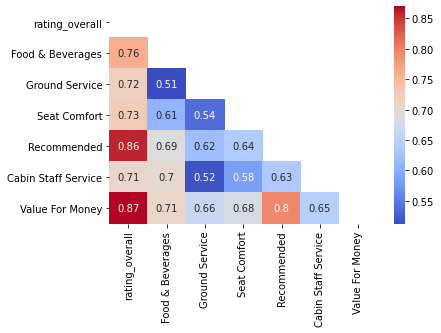

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
corr = df.corr()

# Mask the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create the heatmap with triangular matrix plot
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True)

# Show the plot
plt.show()

In [16]:
total_tvl= df.groupby('Type Of Traveller')['Recommended'].count()
yes_tvl= df.groupby('Type Of Traveller')['Recommended'].sum()
no_tvl= total_tvl- yes_tvl

In [17]:
df[df['Year-Month'] > '2018-12']['Year-Month']

0      2023-04
1      2023-03
2      2023-03
3      2023-03
4      2023-03
        ...   
806    2019-01
809    2019-01
814    2019-01
816    2019-01
821    2019-01
Name: Year-Month, Length: 725, dtype: period[M]

In [18]:
df[df['Year-Month'] > '2018-12']['Year-Month']

0      2023-04
1      2023-03
2      2023-03
3      2023-03
4      2023-03
        ...   
806    2019-01
809    2019-01
814    2019-01
816    2019-01
821    2019-01
Name: Year-Month, Length: 725, dtype: period[M]

<function matplotlib.pyplot.show(close=None, block=None)>

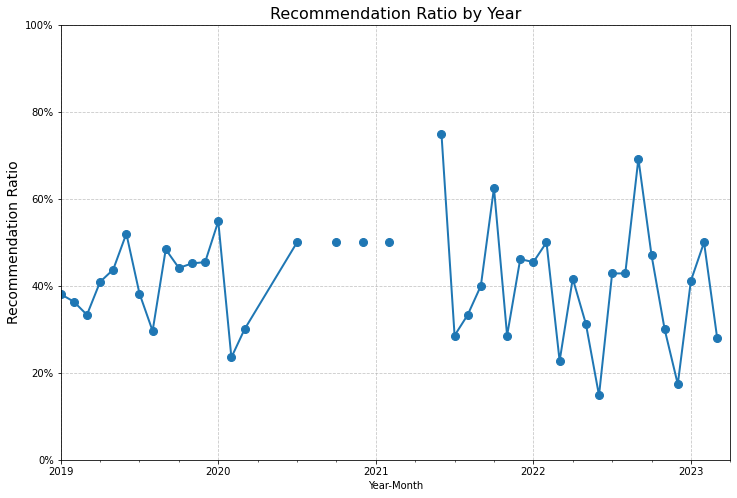

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pre_5_year = df[df['Year-Month'] > '2018-12']['Year-Month']

# Group by year and recommendation status and count the occurrences
rec_counts = pre_5_year.groupby([pre_5_year, df['Recommended']]).size().unstack()

# Calculate the recommendation ratio (yes / (no + yes))
rec_counts['ratio'] = rec_counts[1] / (rec_counts[0] + rec_counts[1])

plt.figure(figsize=(12, 8))
ax = rec_counts['ratio'].plot(marker='o', markersize=8, linestyle='-', linewidth=2)
plt.title('Recommendation Ratio by Year', fontsize=16)
#plt.xlabel('Year', fontsize=14)
plt.ylabel('Recommendation Ratio', fontsize=14)

# Customize the appearance of the chart
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.ylim(0, 1)


# Format y-axis tick labels as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

plt.show

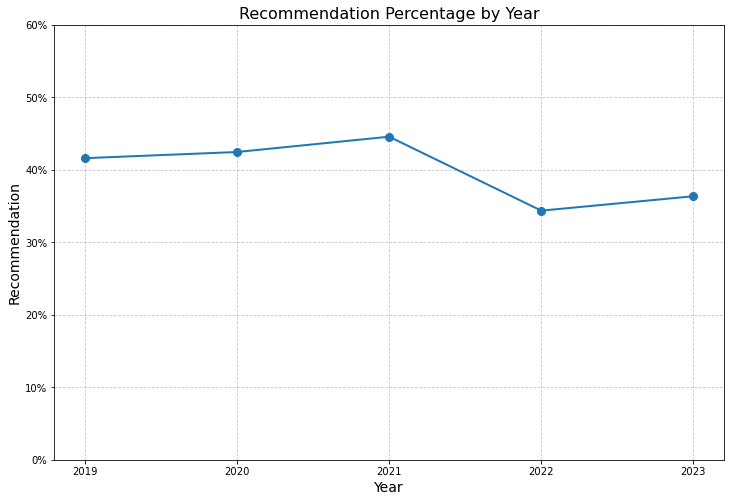

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your data frame
# Make sure 'Year-Month' is in datetime format
# df['Year-Month'] = pd.to_datetime(df['Year-Month'])

# Filter the data for the last 5 years
pre_5_year = df[df['Year-Month'] > '2018-12']['Year-Month']

# Group by year and recommendation status and count the occurrences
rec_counts = pre_5_year.groupby([pre_5_year.dt.year, df['Recommended']]).size().unstack()

# Calculate the recommendation ratio (yes / (no + yes))
rec_counts['ratio'] = rec_counts[1] / (rec_counts[0] + rec_counts[1])

plt.figure(figsize=(12, 8))
ax = rec_counts['ratio'].plot(marker='o', markersize=8, linestyle='-', linewidth=2)
plt.title('Recommendation Percentage by Year', fontsize=16)
plt.ylabel('Recommendation', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Customize the appearance of the chart
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.ylim(0, 0.6)

# Set custom xticks
plt.xticks([2019, 2020, 2021, 2022, 2023])

# Format y-axis tick labels as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

plt.show()


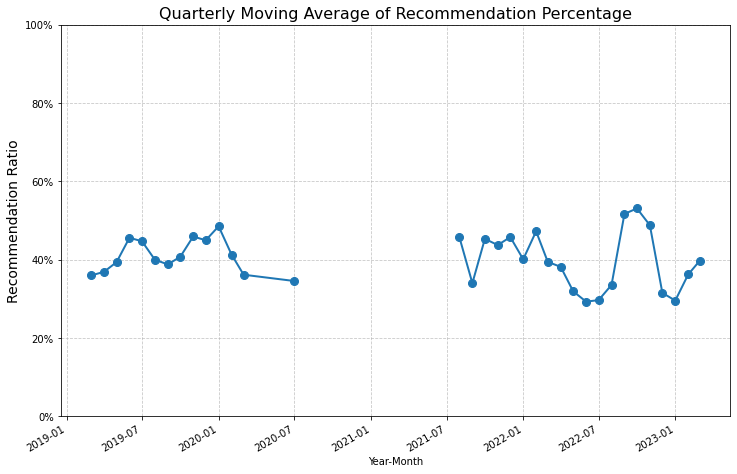

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your data frame
# Make sure 'Year-Month' is in datetime format
# df['Year-Month'] = pd.to_datetime(df['Year-Month'])

# Filter the data for the last 5 years
pre_5_year = df[df['Year-Month'] > '2018-12']['Year-Month']

# Group by year, month, and recommendation status and count the occurrences
rec_counts = pre_5_year.groupby([pre_5_year.dt.to_timestamp(), df['Recommended']]).size().unstack()

# Calculate the recommendation ratio (yes / (no + yes))
rec_counts['ratio'] = rec_counts[1] / (rec_counts[0] + rec_counts[1])

# Calculate the moving average quarterly
rec_counts['moving_avg'] = rec_counts['ratio'].rolling(window=3).mean()

plt.figure(figsize=(12, 8))
ax = rec_counts['moving_avg'].plot(marker='o', markersize=8, linestyle='-', linewidth=2)
plt.title('Quarterly Moving Average of Recommendation Percentage', fontsize=16)
plt.ylabel('Recommendation Ratio', fontsize=14)

# Customize the appearance of the chart
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.ylim(0, 1)

# Format y-axis tick labels as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=30)

plt.show()


In [22]:
#here add more line plot of different ratings 

In [23]:
df_rating= df[['Year-Month', 'Food & Beverages', 'Ground Service', 'Seat Comfort', 'Cabin Staff Service', 'Value For Money']]
df_rating=  df_rating.dropna()
df_rating_plot= df_rating[df_rating['Year-Month'] > '2018-01']
df_rating_plot

,Year-Month,Food & Beverages,Ground Service,Seat Comfort,Cabin Staff Service,Value For Money
0,2023-04,2.0,3.0,3.0,2.0,2
1,2023-03,3.0,4.0,4.0,5.0,5
2,2023-03,5.0,4.0,4.0,5.0,5
3,2023-03,3.0,3.0,3.0,3.0,1
5,2023-03,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...
1110,2018-02,5.0,4.0,3.0,5.0,4
1111,2018-02,1.0,4.0,3.0,5.0,3
1113,2018-02,3.0,3.0,3.0,4.0,4
1117,2018-02,1.0,2.0,2.0,1.0,1


In [24]:
# comparison of different ratings
# ('Food & Beverages', 'Ground Service', 'Seat Comfort', 'Cabin Staff Service', 'Value For Money')

In [25]:
df_rating['Food & Beverages']= df_rating['Food & Beverages'].fillna(df_rating['Food & Beverages'].mean())
df_rating['Ground Service']= df_rating['Ground Service'].fillna(df_rating['Ground Service'].mean())
df_rating['Seat Comfort']  = df_rating['Seat Comfort'].fillna(df_rating['Seat Comfort'].mean())
df_rating['Cabin Staff Service']= df_rating['Cabin Staff Service'].fillna(df_rating['Cabin Staff Service'].mean()) 
df_rating['Value For Money'] = df_rating['Value For Money'].fillna(df_rating['Value For Money'].mean())

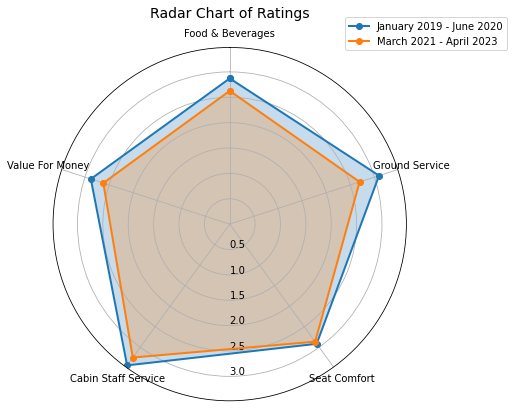

In [26]:
import numpy as np
import matplotlib.pyplot as plt

continuous_features = ['Food & Beverages', 'Ground Service', 'Seat Comfort', 'Cabin Staff Service', 'Value For Money']
feature_means_1 = df[(df['Year-Month'] >= '2019') & (df['Year-Month'] < '2020-06')][continuous_features].dropna().mean().values
feature_means_2 = df[(df['Year-Month'] >= '2021-3')][continuous_features].dropna().mean().values

num_vars = len(continuous_features)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6.5, 6.5), subplot_kw=dict(polar=True))

# Plot the data for the first time period
ax.plot(angles, np.append(feature_means_1, feature_means_1[0]), linewidth=2, linestyle='solid', marker='o', markersize=6, label='January 2019 - June 2020')
ax.fill(angles, np.append(feature_means_1, feature_means_1[0]), alpha=0.25)

# Plot the data for the second time period
ax.plot(angles, np.append(feature_means_2, feature_means_2[0]), linewidth=2, linestyle='solid', marker='o', markersize=6, label='March 2021 - April 2023')
ax.fill(angles, np.append(feature_means_2, feature_means_2[0]), alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), continuous_features)
ax.set_rlabel_position(180)

plt.title('Radar Chart of Ratings', fontsize=14, pad=30)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


In [54]:
df['Type Of Traveller'] 

0             Business
1         Solo Leisure
2       Couple Leisure
3             Business
4       Couple Leisure
             ...      
2741          Business
2742          Business
2743          Business
2744          Business
2745    Family Leisure
Name: Type Of Traveller, Length: 2653, dtype: object

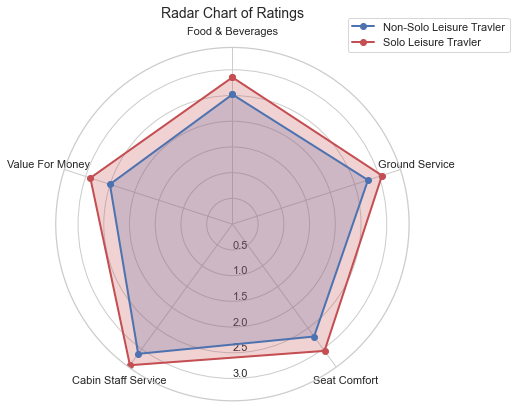

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your data frame
continuous_features = ['Food & Beverages', 'Ground Service', 'Seat Comfort', 'Cabin Staff Service', 'Value For Money']

feature_means_1 = df[df['Type Of Traveller'] != 'Solo Leisure'][continuous_features].mean().values
feature_means_2 = df[df['Type Of Traveller'] == 'Solo Leisure'][continuous_features].mean().values

num_vars = len(continuous_features)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the plot

fig, ax = plt.subplots(figsize=(6.5, 6.5), subplot_kw=dict(polar=True))

# Plot the data for Non-Business travellers
ax.plot(angles, np.append(feature_means_1, feature_means_1[0]), linewidth=2, linestyle='solid', marker='o', markersize=6, label="Non-Solo Leisure Travler")
ax.fill(angles, np.append(feature_means_1, feature_means_1[0]), alpha=0.25)

# Plot the data for Business travellers
ax.plot(angles, np.append(feature_means_2, feature_means_2[0]), linewidth=2, linestyle='solid', marker='o', markersize=6, label="Solo Leisure Travler", color='r')
ax.fill(angles, np.append(feature_means_2, feature_means_2[0]), alpha=0.25, color='r')

# Customize the plot
ax.set_theta_offset(np.pi / 2)  # Set the starting angle
ax.set_theta_direction(-1)  # Set the clockwise direction
ax.set_thetagrids(np.degrees(angles[:-1]), continuous_features)
ax.set_rlabel_position(180)

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Radar Chart of Ratings', fontsize=14, pad=30)
plt.show()


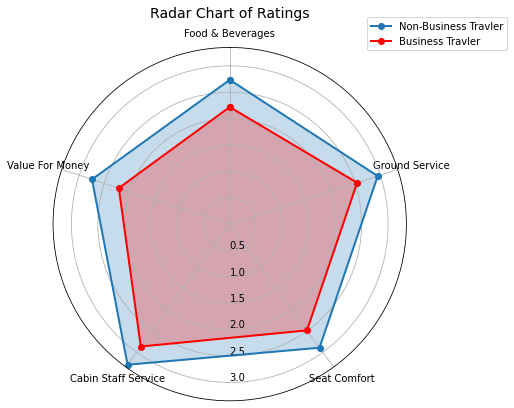

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your data frame
continuous_features = ['Food & Beverages', 'Ground Service', 'Seat Comfort', 'Cabin Staff Service', 'Value For Money']

feature_means_1 = df[df['Type Of Traveller'] != 'Business'][continuous_features].mean().values
feature_means_2 = df[df['Type Of Traveller'] == 'Business'][continuous_features].mean().values

num_vars = len(continuous_features)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the plot

fig, ax = plt.subplots(figsize=(6.5, 6.5), subplot_kw=dict(polar=True))

# Plot the data for Non-Business travellers
ax.plot(angles, np.append(feature_means_1, feature_means_1[0]), linewidth=2, linestyle='solid', marker='o', markersize=6, label="Non-Business Travler")
ax.fill(angles, np.append(feature_means_1, feature_means_1[0]), alpha=0.25)

# Plot the data for Business travellers
ax.plot(angles, np.append(feature_means_2, feature_means_2[0]), linewidth=2, linestyle='solid', marker='o', markersize=6, label="Business Travler", color='r')
ax.fill(angles, np.append(feature_means_2, feature_means_2[0]), alpha=0.25, color='r')

# Customize the plot
ax.set_theta_offset(np.pi / 2)  # Set the starting angle
ax.set_theta_direction(-1)  # Set the clockwise direction
ax.set_thetagrids(np.degrees(angles[:-1]), continuous_features)
ax.set_rlabel_position(180)

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Radar Chart of Ratings', fontsize=14, pad=30)
plt.show()


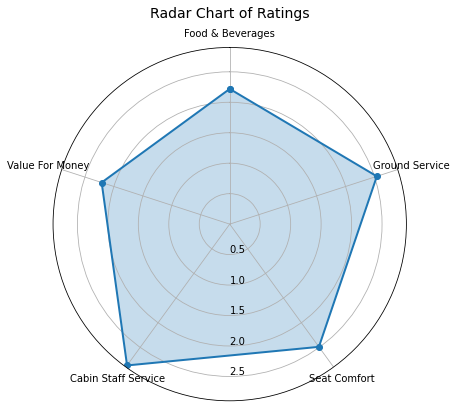

In [28]:
continuous_features = ['Food & Beverages', 'Ground Service', 'Seat Comfort', 'Cabin Staff Service', 'Value For Money']

# Calculate the mean values for each feature
feature_means = df[df['Type Of Traveller'] == 'Business'][continuous_features].mean().values

# Set up the radar chart
num_vars = len(continuous_features)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the plot

fig, ax = plt.subplots(figsize=(6.5, 6.5), subplot_kw=dict(polar=True))

# Plot the data
ax.plot(angles, np.append(feature_means, feature_means[0]), linewidth=2, linestyle='solid', marker='o', markersize=6)
ax.fill(angles, np.append(feature_means, feature_means[0]), alpha=0.25)

# Customize the plot
ax.set_theta_offset(np.pi / 2)  # Set the starting angle
ax.set_theta_direction(-1)  # Set the clockwise direction
ax.set_thetagrids(np.degrees(angles[:-1]), continuous_features)
ax.set_rlabel_position(180)


plt.title('Radar Chart of Ratings', fontsize=14, pad=30)
plt.show()


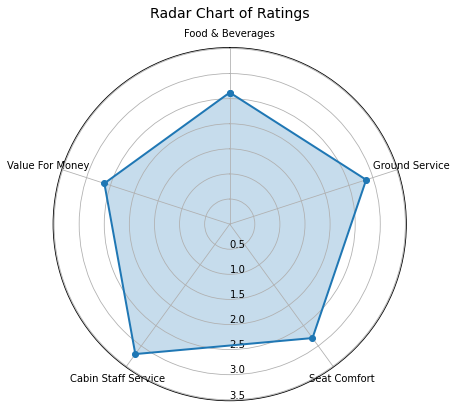

In [29]:
import numpy as np
import matplotlib.pyplot as plt

continuous_features = ['Food & Beverages', 'Ground Service', 'Seat Comfort', 'Cabin Staff Service', 'Value For Money']
feature_means = df[continuous_features].mean().values

num_vars = len(continuous_features)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6.5, 6.5), subplot_kw=dict(polar=True))

ax.plot(angles, np.append(feature_means, feature_means[0]), linewidth=2, linestyle='solid', marker='o', markersize=6)
ax.fill(angles, np.append(feature_means, feature_means[0]), alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), continuous_features)
ax.set_rlabel_position(180)

# Set radial axis limits and gridlines
ax.set_ylim(0, max(feature_means) * 1.1)
#ax.yaxis.set_ticks(np.arange(0, max(feature_means) * 1.1, max(feature_means) / num_vars))

plt.title('Radar Chart of Ratings', fontsize=14, pad=30)
plt.show()


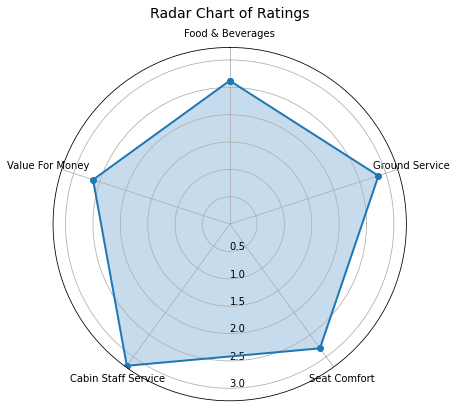

In [30]:
continuous_features = ['Food & Beverages', 'Ground Service', 'Seat Comfort', 'Cabin Staff Service', 'Value For Money']

# Calculate the mean values for each feature
feature_means = df[continuous_features].mean().values

# Set up the radar chart
num_vars = len(continuous_features)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the plot

fig, ax = plt.subplots(figsize=(6.5, 6.5), subplot_kw=dict(polar=True))

# Plot the data
ax.plot(angles, np.append(feature_means, feature_means[0]), linewidth=2, linestyle='solid', marker='o', markersize=6)
ax.fill(angles, np.append(feature_means, feature_means[0]), alpha=0.25)

# Customize the plot
ax.set_theta_offset(np.pi / 2)  # Set the starting angle
ax.set_theta_direction(-1)  # Set the clockwise direction
ax.set_thetagrids(np.degrees(angles[:-1]), continuous_features)
ax.set_rlabel_position(180)


plt.title('Radar Chart of Ratings', fontsize=14, pad=30)
plt.show()

In [31]:
df.groupby('Aircraft')['name'].count().sort_values(ascending= False)
df.groupby('Aircraft')['name'].count().nlargest(7).index
df.groupby('Aircraft')['name'].count().nlargest(11)

Aircraft
A320              337
Boeing 777        263
Boeing 747-400    182
A380              160
Boeing 777-200    123
A319              107
Boeing 747         85
A321               75
Boeing 787         60
Boeing 767         41
Boeing 787-9       37
Name: name, dtype: int64

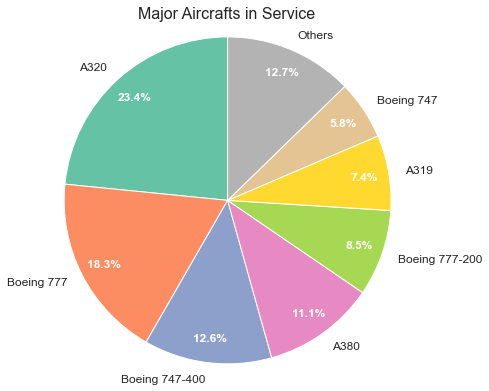

In [37]:
values= [337, 263, 182, 160, 123, 107, 84, 183]
major_aircraft= ['A320', 'Boeing 777', 'Boeing 747-400', 'A380', 'Boeing 777-200','A319', 'Boeing 747', 'Others']
colors = plt.cm.Set2(np.arange(len(values)))  # Set the colors using the Set2 colormap

fig, ax = plt.subplots(figsize=(6.5, 6.5))

# Plot the pie chart
wedges, texts, autotexts = ax.pie(values, labels=major_aircraft, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=0.85)

# Customize the appearance of the pie chart
ax.set_title('Major Aircrafts in Service', fontsize=16)
ax.axis('equal') # Equal aspect ratio ensures the pie chart is circular
plt.setp(texts, fontsize=12)
plt.setp(autotexts, fontsize=12, fontweight='bold', color='white')

plt.show()


In [33]:
aircraft_list = df.groupby('Aircraft')['name'].count().nlargest(7).index.to_list()
df_aircraft = df[df['Aircraft'].isin(aircraft_list)]
df_aircraft.groupby('Aircraft')['Seat Comfort'].mean().nlargest(7)

Aircraft
A380              3.312500
Boeing 777-200    2.983740
Boeing 777        2.854962
Boeing 747-400    2.840659
A320              2.822289
A319              2.811321
Boeing 747        2.517647
Name: Seat Comfort, dtype: float64

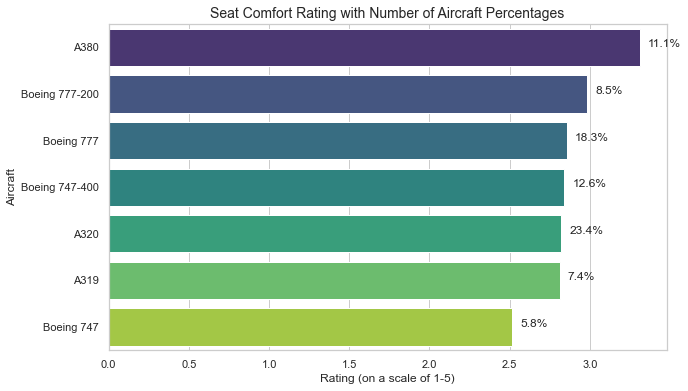

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

aircraft_data = {
    'Aircraft': ['A380', 'Boeing 777-200', 'Boeing 777', 'Boeing 747-400', 'A320', 'A319', 'Boeing 747'],
    'Value': [3.312500, 2.983740, 2.854962, 2.840659, 2.822289, 2.811321, 2.517647],
    'pct': [11.1, 8.5, 18.3, 12.6, 23.4, 7.4, 5.8]
}

# Create a DataFrame from the given data
df_aircraft = pd.DataFrame(aircraft_data)

# Sort the DataFrame in descending order based on the 'Value' column
df_aircraft_sorted = df_aircraft.sort_values(by='Value', ascending=False)

# Set the seaborn style
sns.set(style="whitegrid")

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=df_aircraft_sorted['Value'], y=df_aircraft_sorted['Aircraft'], palette='viridis')

# Add percentage text to the right of each bar
for i, (value, percentage) in enumerate(zip(df_aircraft_sorted['Value'], df_aircraft_sorted['pct'])):
    ax.text(value + 0.05, i, f'{percentage:.1f}%', fontsize=12)

# Customize the appearance of the chart
ax.set_xlabel('Rating (on a scale of 1-5)', fontsize=12)
ax.set_ylabel('Aircraft', fontsize=12)
ax.set_title('Seat Comfort Rating with Number of Aircraft Percentages', fontsize=14)

# Show the chart
plt.show()


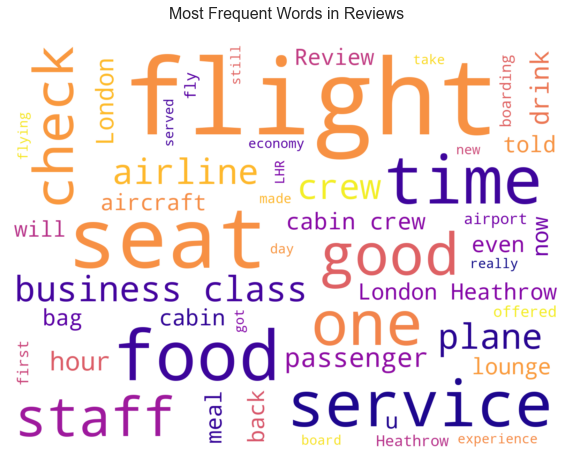

In [38]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Get the reviews as a list of strings
text = df.reviews.values.tolist()

# Define the set of stopwords to remove
stopwords = set(list(STOPWORDS) + ['BA', 'British', 'Airways'])

# Generate the word cloud
wordcloud = WordCloud(background_color="white", margin=20, width=800, height=600,
                      prefer_horizontal=0.7, max_words=50, scale=2, stopwords=stopwords,
                      max_font_size=150, random_state=42,
                      colormap='plasma').generate(text=' '.join(text))

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequent Words in Reviews', fontsize=16, pad=20)

plt.show()


### Statistical Tests

In [39]:
# Identify the aspects of customer dissatisfaction
# Analyze the correlation between individual ratings and customer recommendations

In [40]:
df_ratings= df[['Food & Beverages', 'Ground Service', 'Seat Comfort', 'Cabin Staff Service', 'Value For Money', 'Recommended']]
df_ratings= df_ratings.dropna()

In [41]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the mentioned columns


# Calculate the correlation coefficients
correlation = df[['Food & Beverages', 'Ground Service', 'Seat Comfort', 'Cabin Staff Service', 'Value For Money', 'Recommended']].corr()

# Display the correlation between each feature and the 'Recommended' column
print(correlation['Recommended'])


Food & Beverages       0.691970
Ground Service         0.619855
Seat Comfort           0.638180
Cabin Staff Service    0.634967
Value For Money        0.795257
Recommended            1.000000
Name: Recommended, dtype: float64


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'df' is your DataFrame containing the mentioned columns

# Define the independent variables (features) and the dependent variable (target)
features = df_ratings[['Food & Beverages', 'Ground Service', 'Seat Comfort', 'Cabin Staff Service', 'Value For Money']]
target = df_ratings['Recommended']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create the logistic regression model
logreg = LogisticRegression()

# Train the model using the training data
logreg.fit(X_train, y_train)

# Make predictions using the test data
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the coefficients of the logistic regression model
coefficients = pd.DataFrame(logreg.coef_[0], features.columns, columns=['Coefficient'])
print("\nCoefficients:")
print(coefficients)


Confusion Matrix:
[[276  20]
 [ 14 168]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       296
           1       0.89      0.92      0.91       182

    accuracy                           0.93       478
   macro avg       0.92      0.93      0.93       478
weighted avg       0.93      0.93      0.93       478


Coefficients:
                     Coefficient
Food & Beverages        0.469723
Ground Service          0.524178
Seat Comfort            0.494085
Cabin Staff Service     0.423013
Value For Money         1.482666


Used random forest classifer and XGB Classifier to derive feature importance, the least important one is Cabin Staff Service, so I also did a chi-square test on the independence of 'Cabin Staff Service' and 'Recommedndation', which turns out statistically significant, meaning Cabin Staff Service do affect whether customer recommend or not. 

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'df' is your DataFrame containing the mentioned columns


# Define the independent variables (features) and the dependent variable (target)
features = df_ratings[['Food & Beverages', 'Ground Service', 'Seat Comfort', 'Cabin Staff Service', 'Value For Money']]
target = df_ratings['Recommended']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create the Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier using the training data
rfc.fit(X_train, y_train)

# Make predictions using the test data
y_pred = rfc.predict(X_test)

# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the feature importances
feature_importances = pd.DataFrame(rfc.feature_importances_, index=features.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)


Confusion Matrix:
[[281  15]
 [ 18 164]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       296
           1       0.92      0.90      0.91       182

    accuracy                           0.93       478
   macro avg       0.93      0.93      0.93       478
weighted avg       0.93      0.93      0.93       478


Feature Importances:
                     Importance
Value For Money        0.426257
Food & Beverages       0.194486
Cabin Staff Service    0.145722
Ground Service         0.124360
Seat Comfort           0.109175


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Define the independent variables (features) and the dependent variable (target)
features = df_ratings[['Food & Beverages', 'Ground Service', 'Seat Comfort', 'Cabin Staff Service', 'Value For Money']]
target = df_ratings['Recommended']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the classifier using the training data
xgb_clf.fit(X_train, y_train)

# Make predictions using the test data
y_pred = xgb_clf.predict(X_test)

# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the feature importances
feature_importances = pd.DataFrame(xgb_clf.feature_importances_, index=features.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)


Confusion Matrix:
[[273  23]
 [ 18 164]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       296
           1       0.88      0.90      0.89       182

    accuracy                           0.91       478
   macro avg       0.91      0.91      0.91       478
weighted avg       0.91      0.91      0.91       478


Feature Importances:
                     Importance
Value For Money        0.837217
Food & Beverages       0.047721
Cabin Staff Service    0.041626
Ground Service         0.037669
Seat Comfort           0.035767


#### Independence of Rating (Seat Comfort) and Recommendation

In [49]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df_ratings contains the 'Cabin Staff Service' and 'Recommended' columns
# Convert the 'Cabin Staff Service' continuous variable to a categorical variable
# by creating bins (e.g., 'low', 'medium', 'high')

bins = [0, 2, 4, 5]
labels = ['low', 'medium', 'high']
df_ratings['Seat Comfort Category'] = pd.cut(df_ratings['Seat Comfort'], bins=bins, labels=labels)

# Create a contingency table
contingency_table = pd.crosstab(df_ratings['Seat Comfort Category'], df_ratings['Recommended'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)
if p_value < 0.05:
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    print('Result: Statistically significant')
else:
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    print('Result: Not statistically significant')
    

Chi-square statistic: 883.9135318496997
P-value: 1.1497815065354392e-192
Result: Statistically significant


#### Individual Ratings Difference of Business Traveler and Non-traveler

In [50]:
#check the difference of Business Traveler and Non-traveler indivudual ratings
from scipy import stats
columns = ['Food & Beverages', 'Ground Service', 'Seat Comfort', 'Cabin Staff Service', 'Value For Money']

feature_means_1= df[df['Type Of Traveller'] == 'Business'][columns].dropna()
feature_means_2= df[df['Type Of Traveller'] != 'Business'][columns].dropna()

for column in columns:
    t_stat, p_value = stats.ttest_ind(feature_means_1[column], feature_means_2[column], equal_var=False)
    print(f"Column: {column}")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Result: The means are significantly different.")
    else:
        print("Result: The means are not significantly different.")
    print("\n")


Column: Food & Beverages
T-statistic: -7.6618
P-value: 0.0000
Result: The means are significantly different.


Column: Ground Service
T-statistic: -6.2236
P-value: 0.0000
Result: The means are significantly different.


Column: Seat Comfort
T-statistic: -6.9468
P-value: 0.0000
Result: The means are significantly different.


Column: Cabin Staff Service
T-statistic: -6.2887
P-value: 0.0000
Result: The means are significantly different.


Column: Value For Money
T-statistic: -8.3554
P-value: 0.0000
Result: The means are significantly different.




#### Individual Ratings Difference of Pre-Covid and Post-covid 

In [51]:
#check the difference of individual ratings pre-covid and post-covid
feature_means_1 = df[(df['Year-Month'] >= '2019') & (df['Year-Month'] < '2020-06')][continuous_features].dropna()
feature_means_2 = df[(df['Year-Month'] >= '2021-03')][continuous_features].dropna()

from scipy import stats
columns = ['Food & Beverages', 'Ground Service', 'Seat Comfort', 'Cabin Staff Service', 'Value For Money']

for column in columns:
    t_stat, p_value = stats.ttest_ind(feature_means_1[column], feature_means_2[column], equal_var=False)
    print(f"Column: {column}")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Result: The means are significantly different.")
    else:
        print("Result: The means are not significantly different.")
    print("\n")

Column: Food & Beverages
T-statistic: 2.0362
P-value: 0.0422
Result: The means are significantly different.


Column: Ground Service
T-statistic: 3.3002
P-value: 0.0010
Result: The means are significantly different.


Column: Seat Comfort
T-statistic: 0.4733
P-value: 0.6362
Result: The means are not significantly different.


Column: Cabin Staff Service
T-statistic: 1.5720
P-value: 0.1165
Result: The means are not significantly different.


Column: Value For Money
T-statistic: 2.1524
P-value: 0.0318
Result: The means are significantly different.




#### Individual Ratings Difference of Solo-leisure Traveler and Non-solo-leisure Traveler 

In [56]:
feature_means_1= df[df['Type Of Traveller'] == 'Solo Leisure'][columns].dropna()
feature_means_2= df[df['Type Of Traveller'] != 'Solo Leisure'][columns].dropna()

for column in columns:
    t_stat, p_value = stats.ttest_ind(feature_means_1[column], feature_means_2[column], equal_var=False)
    print(f"Column: {column}")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Result: The means are significantly different.")
    else:
        print("Result: The means are not significantly different.")
    print("\n")


Column: Food & Beverages
T-statistic: 5.2260
P-value: 0.0000
Result: The means are significantly different.


Column: Ground Service
T-statistic: 4.7044
P-value: 0.0000
Result: The means are significantly different.


Column: Seat Comfort
T-statistic: 5.8673
P-value: 0.0000
Result: The means are significantly different.


Column: Cabin Staff Service
T-statistic: 3.9262
P-value: 0.0001
Result: The means are significantly different.


Column: Value For Money
T-statistic: 6.5024
P-value: 0.0000
Result: The means are significantly different.


